# Summarizing Automobile Evaluation Data

**01. Import libraries and data**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [17]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**02. Binning numerical data**

As a data analyst or scientist, you will sometimes deal with numerical data that you would like to arrange into different categories. For example, imagine you are looking at the ages of a set of individuals. You might care more about the age category each person falls under (20-29, 30-39, 40-49, etc) than the exact age. The process of transforming numerical variables into categorical counterparts is called “binning.”

Binning is a way to group a number of continuous values into a smaller number of “bins”. We see this in the real world quite often. For example, a student’s letter grade is determined by the percentage “bin” they fall under. Moreover, an individual’s tax rate is determined by the income “bin” they fall under.


In [19]:
# store the ages
individual_ages = df.age
# return min value 
print(df.age.min())
# return max values
print(df.age.max())
# define the bin boundories by decade  (20-29, 30-39, 40-49, 50-59, 60-69).
bins = [10, 20, 30, 40, 50, 60, 70]
# we can also specify labels for our bins using a label argument 
# Bin the value of the age column and specify labels 
age_labels = ['Teens', 'Young Adult', 'Adult', 'Middle Aged', 'Middle-Older Age', 'Senior']

18
64


In [20]:
# next create the bins by using next method, bins is either an integer specifing the number evenly spaced bins or a list.
# Create new binned_age column that bins the values of the ‘Age’ column
df['binned age'] = pd.cut(df.age, bins, labels = age_labels)
df.head()

,age,sex,bmi,children,smoker,region,charges,binned age
0,19,female,27.900,0,yes,southwest,16884.92400,Teens
1,18,male,33.770,1,no,southeast,1725.55230,Teens
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult


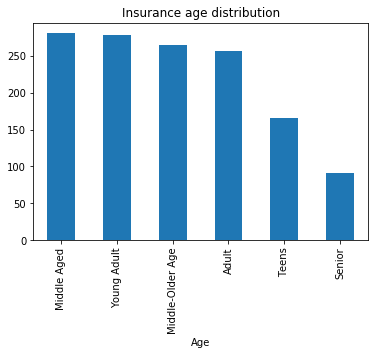

In [21]:
df['binned age'].value_counts().plot(kind = 'bar')
plt.title('Insurance age distribution')
plt.xlabel('Age')
plt.show()

**Combining categorical data**

    categorical data are variables that contain label values rather than numeric values
   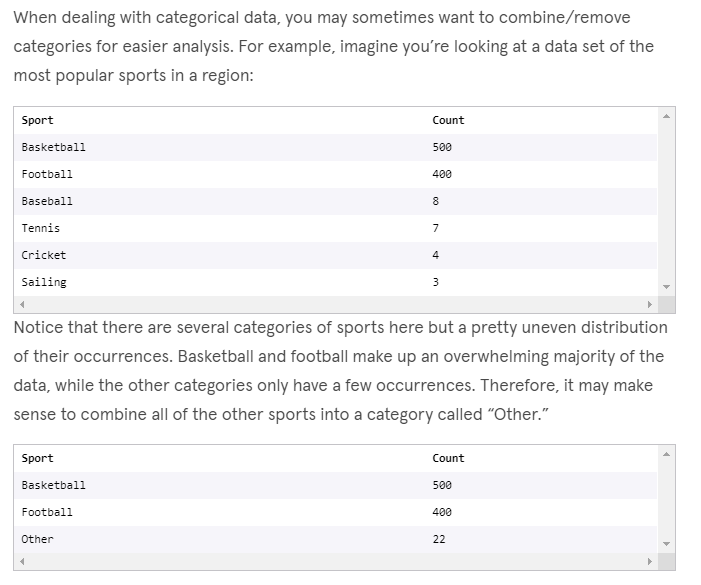

In [22]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [23]:
# for BMI column  we'll check the values whose occuring less than 11
mask = df.children.isin([children > 3].index)
df[mask] = 'other'
df.children.value_counts()

NameError: name 'children' is not defined

**Data transformation - Log Transformation**

Log transformation is a data transformation method that replaces each variable x with log(x).

    When log transformation is applied to data that is not normally distributed, the result is that the data will be less skewed, or more “normal” than before. For example, after applying log transformation to the right-skewed data set above, we would see something similar to the following:
    Notice how the shape of the data changed. The logarithm function squeezes together the larger values in your data set and stretches out the smaller values, making the transformed data more “normal” than before.


In [24]:
data = [1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4]
# log transform
log_data = np.log(data)
log_data

array([0.        , 0.        , 0.        , 0.        , 0.69314718,
       0.69314718, 0.69314718, 1.09861229, 1.09861229, 1.38629436,
       1.38629436])

Data scientists and machine learning engineers will generally usually use powerful machine learning libraries such as scikit-learn to apply log transformation. You can import PowerTransformer from sklearn’s preprocessing module and then pass in your data to a simple function call:

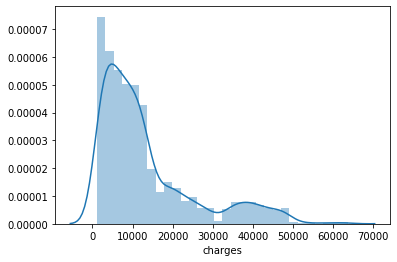

In [25]:
# before log transform
sns.distplot(df.charges)
plt.show()

In [26]:
# let's see how skewed is data 
df.charges.skew()

1.5158796580240388

Generally, if skewness is less than -1 or greater than 1, the distribution is highly skewed. Our distribution has a skewness of 1.51, so it is highly skewed.

In [27]:
# after log transform 
data = df.charges
log_data = np.log(data)

In [28]:
# let's see how skewed is data 
log_data.skew()

-0.09009752473024583

Applying log transformation reduced the skewness from 1.51 to - 0.09 — that’s a significant change!

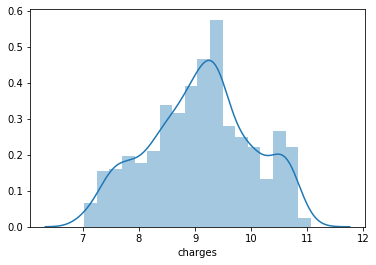

In [29]:
sns.distplot(log_data)
plt.show()

But what happens if you have negative numbers in your data? You cannot take the log of a negative number, so log transformation will not work.

In this case, you would have to explore other data transformation techniques, such as cube root transformation, which involves converting x to x^(1/3). This transformation reduces the right skewness but also has the benefit of working with zero and negative values.

**Numpy.cbrt**

ou cannot take the log of a negative number, so log transformation will not work.

In this case, you would have to explore other data transformation techniques, such as **cube root transformation**, which involves converting x to x^(1/3). This transformation reduces the right skewness but also has the benefit of working with zero and negative values.

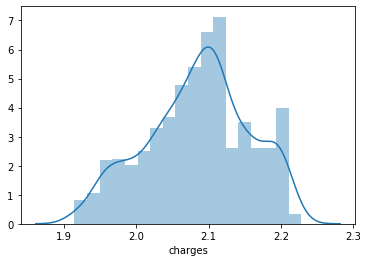

In [30]:
cube_data = np.cbrt(log_data)
sns.distplot(cube_data)
plt.show()

In [31]:
# let's see how skewed is data 
cube_data.skew()

-0.22974866262732482